# <center>Day 2: matching models with fully transferable utility</center>
### <center>Alfred Galichon (NYU)</center>
## <center>'math+econ+code' masterclass on equilibrium transport and matching models in economics</center>
<center>© 2020 by Alfred Galichon.  Support from  NSF DMS-1716489 and ERC CoG-866274 EQUIPRICE grants is acknowledged.</center>

#### <center>with Python code</center>

**If you reuse code from this masterclass, please cite as:**<br>
Alfred Galichon, 'math+econ+code' masterclass on equilibrium transport and matching models in economics, June 2020. https://github.com/math-econ-code/mec_equil


# References

## Textbooks
* Pierre-André Chiappori (2017). *Matching with Transfers: The Economics of Love and Marriage*. Princeton.
* Alfred Galichon (2016). *Optimal transport methods in economics*. Princeton.

## Papers

* Eugene Choo and Aloysius Siow (2006). "Who marries whom and why." *Journal of Political Economy* 114, no. 1, pp. 175-201.
* Alfred Galichon and Bernard Salanié (2015). "Cupid's invisible hands: Social Surplus and Identification in Matching Models". Preprint.
* Arnaud Dupuy, Alfred Galichon, Sonia Jaffe, and Scott Kominers (2020). "Taxation in matching markets". *International Economic Review*, forthcoming. 

# Matching with no taxes

## Generating worker and firm data

We will consider an academic job market, where candidate professors match with colleges--or rather, academic positions, as each position can only be filled by one applicant. 

A professor $x$ has characteristics $\xi(x) \in \mathbb{R}^d$ where $\xi$ includes measures of skills, such as general skills<br>
$\xi_0$=teaching ability,<br>
$\xi_1$=research ability, and<br>
$\xi_2$=collegiality<br>
as well as specific skills, like<br>
$\xi_3$=proficiency in micro<br>
$\xi_4$=proficiency in macro<br>
$\xi_5$=proficiency in econometrics<br>
and in addition, let's assume $\xi$ also encodes geographic coordinates of the applicant's residential address<br>
$\xi_6$=residential address horizontal geographic coordinate<br>
$\xi_7$=residential address vertical geographic coordinate<br>


and each college offer one position $y$ with characteristics $\zeta(y) \in \mathbb{R}^d$, where $\zeta_k$=how much one unit of characteristics $k$ is valued (in dollar terms) for this position, for $k\in\{0,...,7\}$ and $\zeta_6,\zeta_7$ = college location's geographic coordinates.

We assume that the amenity that worker $x$ associates with working for position $y$ is equal to minus the Euclidian distance between her location and the position's location, that is
$$\alpha_{xy} = - \sqrt{(\xi_{x6} - \zeta_{y6})^2+(\xi_{x7} - \zeta_{y7})^2}.$$

We assume that the output $\gamma_{xy}$ that worker $x$ produces if she takes position $y$ is a CES function where specific/general skills are more or less substituable 
$$\gamma_{xy}=\left( \left(\sum_{k\in\{0,...,2\} }(\xi_{xk} \zeta_{yk})^{r_g} \right)^{r/{r_g}}+
\left(\sum_{k\in\{3,...,5\} }(\xi_{xk} \zeta_{yk})^{r_s} \right)^{r/{r_s}} \right)^{1/r}.$$


## Generating demand and supply

We shall take 50 applicants, 30 positions, $r_g = .8$, $r_s = .6$ and $r = .7$.

In [1]:
import numpy as np
from scipy.spatial.distance import cdist

np.random.seed(777)
d = 8
nbx = 50 #1200
nby = 30 #1000

rg = .8
rs = .6
r  = .7

n_x = np.ones(nbx)
m_y = np.ones(nby)
ξ_x_k = np.random.rand(nbx,d)
ζ_y_k = np.random.rand(nby,d)

α_x_y = np.zeros((nbx,nby))
γ_x_y = np.zeros((nbx,nby))
for x in range(nbx):
    for y in range(nby):
        α_x_y[x,y] = - np.linalg.norm(ξ_x_k[x,6:7]-ζ_y_k[y,6:7]) / 50
        γ_x_y[x,y] = (np.sum( (ξ_x_k[x,0:3]*ζ_y_k[y,0:3])**rg )**(r/rg)+(  np.sum(  ξ_x_k[x,3:6]*ζ_y_k[y,3:6] )**rs )**(r/rs))**r
        
Φ_x_y = α_x_y + γ_x_y

## Wage determination

Let $w_{xy}$ be the wage that college $y$ would be willing to pay to employee $x$, to be determined. Start by assuming that there are no taxes, so if $x$ and $y$ match, then their payoff are respectively:
$$U_{xy} = \alpha_{xy} + w_{xy}\\
V_{xy}= \gamma_{xy} - w_{xy} $$
while we assume that these payoffs are zero if $x$ and $y$ do not match.

## The equilibirum assignment problem

See class notes.

## The Choo-Siow model


See class notes: when adding logit heterogeneity, we obtaine equilibrium relations:<br>
$\mu_{xy} = \exp(\frac {\Phi_{xy} - a_x - b_y} {2T} )$<br>
$\mu_{x0} = \exp(\frac {- a_x} {T})$<br>
$\mu_{0y} = \exp(\frac {- b_y} {T})$

Matching equilibrium equations become<br>
$\left\{
\begin{array}
[c]{l}%
n_x = \exp(\frac {- a_x} {T}) + \sum_{y\in \mathcal{Y}}\exp(\frac {\Phi_{xy} - a_x - b_y} {2T} )\\
m_y = \exp(\frac {- b_y} {T}) + \sum_{x\in \mathcal{X}}\exp(\frac {\Phi_{xy} - a_x - b_y} {2T} )
\end{array}
\right.$




## The class `ChooSiow_model`

We encode the problem into:

In [2]:
class ChooSiow_model:
    def __init__(self,Φ_x_y,n_x=[],m_y=[],T=1):
        if n_x == []:
            n_x = np.ones(Φ_x_y.shape[0])
        if m_y == []:
            m_y = np.ones(Φ_x_y.shape[1])    
        self.n_x = n_x
        self.m_y = m_y
        self.nbx = n_x.size
        self.nby = m_y.size
        self.Φ_x_y = Φ_x_y
        self.T = T
        self.K_x_y = np.exp(Φ_x_y / (2*T) )
        self.eq_a_x = np.array([])
        self.eq_b_y = np.array([])        
        self.eq_μ_x0 = np.array([])
        self.eq_μ_0y = np.array([])
        self.eq_μ_x_y = np.array([])
        self.eq_deltamarg_x = np.array([])
        self.eq_deltamarg_y = np.array([])
        self.eq_deltainvmarg_x = np.array([])
        self.eq_deltainvmarg_y = np.array([])
        self.comp_code = -1
        self.comp_nbsteps = -1
        self.comp_time = -1.0
    
    def updateΦ(self,Φ_x_y):
        self.Φ_x_y = Φ_x_y
        self.K_x_y = np.exp(Φ_x_y / (2*self.T) )
        return(0)
        
    def M_x_y(self,μ_x0,μ_0y):
        μ_x_y = np.zeros((self.nbx,self.nby))
        for x in range(self.nbx):
            for y in range(self.nby):
                μ_x_y[x,y] = self.K_x_y[x,y] * np.sqrt(μ_x0[x] * μ_0y[y])
        return(μ_x_y)
####################
mkt = ChooSiow_model(Φ_x_y)

## The Choo-Siow model as an optimization problem

Note that the previous equations are the first order conditions of the following optimization problem:<br>
$$\min_{a,b} f_{xy} := \left\{ \sum_x a_x n_x + \sum_y b_y m_y + 2T \sum_{xy} e^{ \frac {\Phi_{xy} - a_x - b_y} {2T} }+ \sum_x e^{\frac {-a_x} {T}} + \sum_y e^{\frac {-b_y} {T}} \right\}$$
that is, setting $A_x =\exp(-a_x / (2T)) $ and $B_y =\exp(-b_x / (2T)) $,<br>
$$\min_{A,B} F(A,B):= \left\{ - \sum_x n_x \log A_x  - \sum_y m_y \log B_y + 2 \sum_{xy} K_{xy} A_x B_y + \sum_x A^2_x + \sum_y B^2_y \right\}$$
where<br>
$K_{xy} = T \exp( \Phi_{xy} / (2T) ).$<br>
One has:<br>
$\frac{ \partial F} {\partial A_x}  = 2 A_x - \frac {n_x} {A_x} + \sum_y K_{xy} B_y$<br>
$\frac{ \partial F} {\partial B_y}  = 2 B_y - \frac {m_y} {B_y} + \sum_x K_{xy} A_x,$


In [3]:
from scipy.optimize import minimize
from time import time

def f(self,ab_z):
    a_x = ab_z[0:self.nbx]
    b_y = ab_z[self.nbx:(self.nbx+self.nby)]
    μ_x0 = np.exp( - a_x /  self.T )
    μ_0y = np.exp( - b_y / self.T )
    μ_x_y = self.M_x_y(μ_x0 , μ_0y)  
    return( np.sum(n_x * a_x ) + np.sum(m_y * b_y ) + 2* np.sum( μ_x_y) + np.sum(μ_x0 ) + np.sum(μ_0y ) )

ChooSiow_model.f = f

def gradf_xy(self,ab_z):
    a_x = ab_z[0:self.nbx]
    b_y = ab_z[self.nbx:(self.nbx+self.nby)]
    μ_x0 = np.exp( - a_x /  self.T )
    μ_0y = np.exp( - b_y / self.T )
    μ_x_y = self.M_x_y(μ_x0 , μ_0y)  
    dGda_x = n_x - μ_x0 - np.sum( μ_x_y , 1)
    dGdb_y = m_y - μ_0y - np.sum( μ_x_y , 0)
    return(np.append(dGda_x,dGdb_y))

ChooSiow_model.gradf_xy = gradf_xy

def solveOptim(self):
    start_time = time()
    uv0_z = np.zeros(nbx+nby)
    res = minimize(self.f, uv0_z,  method='BFGS', jac = self.gradf_xy)
    if res.success == False:
        print('Failed to converge')
    else:
        comp_time = time() - start_time
        a_x = res.x[0:self.nbx]
        b_y = res.x[self.nbx:(self.nbx+self.nby)]
        μ_x0 = np.exp( - a_x /  self.T )
        μ_0y = np.exp( - b_y / self.T )
        μ_x_y = self.M_x_y(μ_x0,μ_0y) 
        self.eq_a_x = a_x
        self.eq_b_y = b_y
        self.eq_μ_x0 = np.exp(- a_x / self.T)
        self.eq_μ_0y = np.exp(- b_y / self.T)
        self.eq_μ_x_y = μ_x_y       
        self.eq_deltamarg_x = n_x - μ_x0 - np.sum( μ_x_y , 1)
        self.eq_deltamarg_y = m_y - μ_0y - np.sum( μ_x_y , 0)
        self.comp_time = comp_time
    return(res.status)

ChooSiow_model.solveOptim = solveOptim
####################
mkt.solveOptim()
mkt.eq_μ_x0

array([0.40647575, 0.43061079, 0.41887237, 0.36880888, 0.3811228 ,
       0.3823579 , 0.39589894, 0.40261791, 0.36740637, 0.39291593,
       0.44384522, 0.37811349, 0.35546923, 0.35927188, 0.41599601,
       0.36390432, 0.41906972, 0.38367414, 0.36658964, 0.40038773,
       0.39516327, 0.46608092, 0.4078038 , 0.40847568, 0.38040058,
       0.38974328, 0.43453843, 0.35263786, 0.47089858, 0.39093242,
       0.41680538, 0.38291219, 0.46399887, 0.46936521, 0.43897156,
       0.41717342, 0.40314248, 0.40759675, 0.36942187, 0.39426959,
       0.39673887, 0.39242597, 0.36050087, 0.40320164, 0.38734409,
       0.34657143, 0.41799766, 0.35522518, 0.44383292, 0.41009229])

In [4]:
A = np.sum(mkt.eq_μ_x_y * α_x_y)
B = np.sum(mkt.eq_μ_x_y * γ_x_y)
print(A,B)

-0.20028504940111574 41.84663630287934


## The Choo-Siow model as an equilibrium problem with GS

Can we reformulate as a competitive equilibrium problem with Gross Substitutes?

Define $p\in \mathbb{R}^{\mathcal{X}\cup\mathcal{Y}}$ by<br>
$p_x = a_x, x\in\mathcal{X}$<br>
$p_y = -b_y, y\in\mathcal{Y}$<br>
and define $q \in \mathbb{R}^{\mathcal{X}\cup\mathcal{Y}}$ by<br>
$q_x = -n_x, x\in\mathcal{X}$<br>
$q_y = b_y, y\in\mathcal{Y}.$<br>

Define<br>
$\left\{
\begin{array}
[c]{l}%
e_x(p) = - \exp(\frac {- p_x} {T}) - \sum_{y\in \mathcal{Y}}\exp(\frac {\Phi_{xy} - p_x + p_y} {2T} )\\
e_y(p) = \exp(\frac {p_y} {T}) + \sum_{x\in \mathcal{X}}\exp(\frac {\Phi_{xy} - p_x +p_y} {2T} )
\end{array}
\right. $

so that the equilibrium problem reformulates as $$e(p)=q.$$

In [5]:
def solveIPFP(self, maxit = 1000,maxvaltol=1e-5,maxsteptol=1e-9,output=0):
    start_time = time()
    code = 0
    deltainvmarg_x = np.zeros(self.nbx)
    deltainvmarg_y = np.zeros(self.nby)
    A_x = np.ones(nbx)
    B_y = np.ones(nby)
    for i in range(maxit):
        
        KThalfA_y = (self.K_x_y.transpose() @ A_x).flatten() / 2
        newB_y = np.sqrt(m_y + KThalfA_y * KThalfA_y ) - KThalfA_y
        deltainvmarg_y = newB_y - B_y
        B_y = newB_y
        
        KBhalf_x = (self.K_x_y @ B_y).flatten() / 2
        newA_x = np.sqrt(n_x + KBhalf_x * KBhalf_x ) - KBhalf_x
        deltainvmarg_x = newA_x - A_x
        A_x = newA_x
        
        deltamarg_y = KThalfA_y * B_y  + B_y * B_y  - m_y
        #print(deltainvmarg_x)
        #print(deltainvmarg_y)
        #print(np.append(deltainvmarg_x,deltainvmarg_y))
        steptol = np.max(np.abs( np.append(deltainvmarg_x,deltainvmarg_y) ) ) 
        valtol = np.max(np.abs(deltamarg_y) )
        
        if output > 1 :
            print("μ_x0=",μ_x0)
        if valtol < maxvaltol :
            code = 0
            break
        if steptol < maxsteptol :
            code = 1
            break
        code = 2    
    comp_time = time() - start_time
    if output > 0 :
        print( 'IPFP converged in', i, 'iterations and ',comp_time,' seconds.')
        #print('Value of μ_x0=",μ_x0)
        print('Max absolute margin discrepancy=', valtol)            
        print('Max absolute update discrepancy =',steptol)
        print('Code =',code)

    μ_x0 = A_x * A_x
    μ_0y = B_y * B_y
    μ_x_y = self.M_x_y(μ_x0,μ_0y)
    self.eq_μ_x0 = μ_x0
    self.eq_μ_0y = μ_0y
    self.eq_μ_x_y = μ_x_y
    self.eq_a_x = - self.T * np.log(μ_x0)
    self.eq_b_y = - self.T * np.log(μ_0y)
    self.eq_deltamarg_x = n_x - μ_x0 - np.sum( μ_x_y , 1)
    self.eq_deltamarg_y = m_y - μ_0y - np.sum( μ_x_y , 0)
    self.eq_deltainvmarg_x = deltainvmarg_x
    self.eq_deltainvmarg_y = deltainvmarg_y
    self.comp_code = code
    self.comp_nbsteps = i
    self.comp_time = comp_time
    return code

    
ChooSiow_model.solveIPFP = solveIPFP
####################
mkt.solveIPFP()
mkt.eq_μ_x0


array([0.40647575, 0.43061081, 0.41887239, 0.3688089 , 0.3811228 ,
       0.3823579 , 0.39589893, 0.40261791, 0.36740638, 0.39291593,
       0.44384526, 0.37811348, 0.35546921, 0.35927193, 0.41599603,
       0.36390436, 0.41906973, 0.38367414, 0.36658965, 0.40038773,
       0.39516327, 0.46608099, 0.40780381, 0.40847568, 0.38040059,
       0.38974328, 0.43453845, 0.35263775, 0.47089866, 0.39093242,
       0.41680539, 0.3829122 , 0.46399894, 0.46936529, 0.4389716 ,
       0.41717343, 0.40314248, 0.40759676, 0.36942188, 0.39426959,
       0.39673886, 0.39242597, 0.36050092, 0.40320164, 0.38734409,
       0.34657134, 0.41799767, 0.35522523, 0.44383296, 0.4100923 ])

# Matching with linear taxes

We now assume that the gross wage $w_{xy}$ is taxed at a linear rate $\tau$, that is<br>
$U_{xy} = \alpha_{xy} + (1-\tau) w_{xy}\\
V_{xy} = \gamma_{xy} - w_{xy},$<br>
so the matching problem is equivalent to a TU matching problem with surplus functions<br>
$\Phi^\tau_{xy} =  \alpha_{xy}   +  (1-\tau )  \gamma_{xy}.$



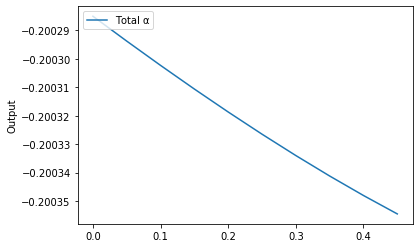

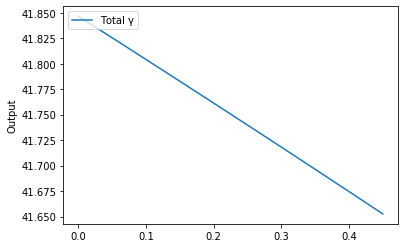

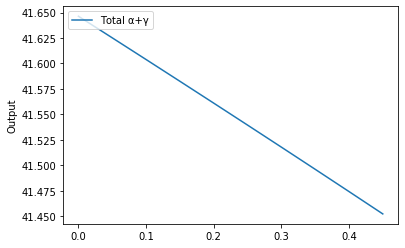

In [7]:
τ_k = np.arange(0,.5,.05)
Φ_k = np.zeros(τ_k.size)
α_k = np.zeros(τ_k.size)
γ_k = np.zeros(τ_k.size)
for k in range(τ_k.size ):
    Φτ_x_y = α_x_y + (1-τ_k[k])* γ_x_y
    mkt.updateΦ(Φτ_x_y)
    mkt.solveIPFP()
    α_k[k] = np.sum(mkt.eq_μ_x_y * α_x_y)
    γ_k[k] = np.sum(mkt.eq_μ_x_y * γ_x_y)
    Φ_k[k] = np.sum(mkt.eq_μ_x_y * (α_x_y+γ_x_y))

import matplotlib.pyplot as plt

plt.plot(τ_k,α_k)
plt.legend(['Total α'], loc='upper left')
plt.ylabel('Output')
plt.show()

plt.plot(τ_k,γ_k)
plt.legend(['Total γ'], loc='upper left')
plt.ylabel('Output')
plt.show()

plt.plot(τ_k,Φ_k)
plt.legend(['Total α+γ'], loc='upper left')
plt.ylabel('Output')
plt.show()
